## The Drunken Sailor Problem in 1D and 2D

### Drunken sailors leaving a pub that is near a ditch ... 1D

A random walk is sometimes described with a drunken sailor who takes a step and then forgets which way he was going and then takes another step.  We start our sailors at $x=0$ (the pub). 

After $N$ steps we expect that the distribution of a bunch 
of sailors (all leaving the pub at the same time) and moving in 1 dimension is Gaussian in shape. The basic idea here is that sometimes the sailor will move "forward", and sometimes they will move "backward".  On average, a sailor will take as many forward as backward steps, and thus the average value will be zero.  Sometimes, though, they will take more forward steps, and sometimes they will take more backward steps, and so there will be some variation around the mean of zero.

A normalized Gaussian probability distribution with mean $\mu=0$ and dispersion $\sigma$  is 
$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-x^2/(2 \sigma^2)} $$
Here the dispersion (or standard deviation) $\sigma$ is the the square root of the variance.
The variance of a probability distribution with zero mean is
$$\sigma^2 = \int p(x) x^2 dx $$

If the dispersion of a single step is $\sigma$ then the distribution of sailors after $N$ steps is
well described by a probability distribution
$$ p(x,N) = \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} $$
with $\sigma_N = \sqrt{N}\sigma$.

Below we illustrate a code that does a 1-dimensional random walk using a sum of Gaussian distributions.  The point is here that we have $n_{part}$ sailors, and each takes $n_{steps}$ steps.  So, we just need to first calculate the final position for one sailor taking $n_{steps}$ steps, and then do that $n_{part}$ times.

The resulting distribution of drunk sailors matches the predicted Gaussian distribution.

One really cool extension of this idea is that there is something called the <b> Central Limit Theorem </b> which states that the sum of a bunch of independent variables should (in most cases)
be well described by a normal (Gaussian) distribution.

See https://en.wikipedia.org/wiki/Central_limit_theorem 

So as long as each step is generated by a well
behaved probability distribution, it does not matter what we use to generate it.  In other words we should
get the same behavior using steps generated from a normal distribution as we would if we had flipped a coin at each step, taking a step of equal length  in either direction.  Here *well behaved* means with finite mean and variance.


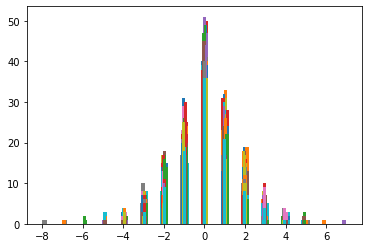

In [1]:
# example making a random walk, using a Poission distribution, and showing that the distribution after a number of
# steps is a gaussian 

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  # random walk using a normal distribution for step sizes
    sign = stats.uniform.rvs(size=nsteps)
    r = stats.poisson.rvs(mu=1.0,size=nsteps)  # poisson distribution mean= 1.0
    r = r/1.0 # scale down to a distance with a mean of 1.0
    #print (sign)
    #print (r)
    for i in range(len(r)):
        if sign[i]<0.5:
            r[i]=r[i]*-1.00
    #print (r)
    plt.hist(r,bins=50)
    # r is a vector values randomly generated with a poission distribution (+ or -)
    return sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


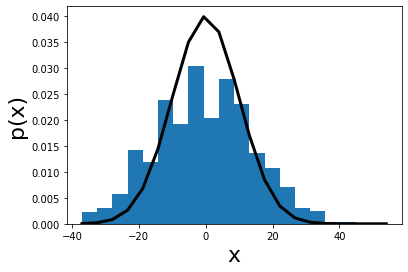

In [2]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

After 100 steps of random walk 1000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).

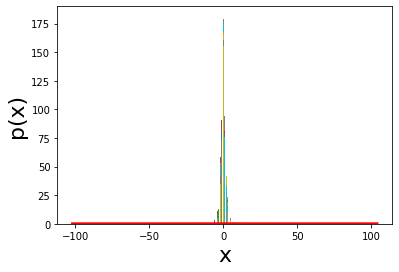

In [3]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

# a gaussian probability density distribution - is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins) # evaluate the probability distribution at the bin values
plt.plot(bins,y,"r", lw=3 )  #plot the expected density distribution as a red line

After 4000 steps of random walk 40000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).
This picture should look even better than the last one as we ran more particles and steps, and that's good.


### Random walk with a ditch

If there is a post at $x_p>0$ the fraction of sailors currently past the post after $N$ steps of size chosen with dispersion $\sigma$ is

\begin{align*}
 f(x_p,N) &= \int_{x_p}^\infty \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} dx \\
 &= \int_{x_p/(\sqrt{2}\sigma_N)}^\infty \frac{1}{\sqrt{\pi}}e^{-z^2} dz\\
 &= \frac{1}{2} {\rm erfc}\left( \frac{x_p}{\sqrt{2}\sigma_N} \right)
\end{align*}
with $\sigma_N = \sqrt{N} \sigma$.

The complimentary error function is defined as
$$ {\rm erfc}(y) \equiv \frac{2}{\pi} \int_y^\infty  e^{-t^2} dt $$

<img src="drunken_sailor.png">

We now place a ditch at a particular $x$ 
location, $x_{ditch}$  which we take to be $>0$.   
If a drunken sailor steps into the ditch then he can't get out and sleeps there until morning.

<ol> 
<li>
We start by computing a probability distribution of remaining sailors that are not in the ditch after a number of steps $N$.
It turns out that the probability distribution is not much different than a Gaussian distribution as long as
$ \sqrt{N}\sigma \ll x_{ditch} $, but as $N$ increases, the distribution becomes lopsided.  We shoudl make sure the distribution is normalized (integrates to 1),
</li>

<li>
We can now calculate, as a function of of numbers of steps $N$, the fraction of sailors left in the ditch. 
</li>
 
We can estimate the fraction of drunk sailors that
have fallen into the ditch  by integrating the tail of the  probability density distribution in the absence of the ditch. 

As above we estimate that the fraction of sailors in the ditch after $N$ steps is described with this function 
$$ f(x_{ditch},N ) \sim \frac{1}{2} {\rm erfc}\left( \frac{x_{ditch}}{\sqrt{2}\sigma_N} \right)$$

The erfc function is available as *math.erfc()*

<li>
As a function of the number of steps $N$, we can compare the numerically measured fraction of sailors in the ditch to
the function $f(x_{ditch}, N )$
 computed with the complimentary error function.

We will see that the analytical estimate is incorrect. In fact, many more sailors wind up in the ditch!
</li>
</ol>

For N=60 and $x_{ditch}=10$, we that find that about twice as many sailors wind up in the ditch as incorrectly
predicted with this formula.

Physicists have exploited this analogy to trap atoms in a potential well using thermal motions.



(array([ 0.41237113,  0.41237113,  0.        ,  0.82474227,  2.4742268 ,
         0.41237113,  1.64948454,  5.77319588,  5.77319588,  7.01030928,
         6.59793814, 15.25773196, 12.37113402, 10.30927835, 21.8556701 ,
        16.08247423, 35.05154639, 21.03092784, 33.40206186, 22.68041237,
        18.96907216, 34.22680412, 16.08247423, 27.62886598, 15.25773196,
        23.91752577, 13.19587629,  9.48453608, 11.95876289,  7.83505155,
         7.42268041,  2.4742268 ,  2.4742268 ,  1.2371134 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.41237113,  0.41237113]),
 array([0.663   , 0.665425, 0.66785 , 0.670275, 0.6727  , 0.675125,
        0.67755 , 0.679975, 0.6824  , 0.684825, 0.68725 , 0.689675,
        0.6921  , 0.694525, 0.69695 , 0.699375, 0.7018  , 0.704225,
        0.70665 , 0.709075, 0.7115  , 0.713925, 0.71635 , 0.718775,
        0.7212  , 0.723625, 0.72605 , 0.728475, 0.7309  , 0.733325,
        0.73575 , 0.738175, 0.7406  , 0.743025, 0.74545 , 0.747875,
      

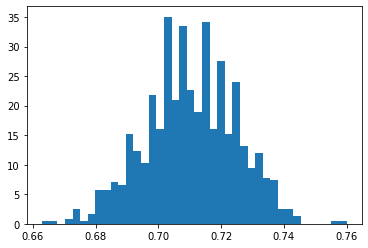

In [4]:
def walk_ditch(xditch,nsteps,sigma):  # random walk using a normal distribution for step sizes
    rg = stats.norm.rvs(size=nsteps,scale=sigma)  # normal distribution mean=0 variance=sig
    
    sign = stats.uniform.rvs(size=nsteps)
    rp = stats.poisson.rvs(mu=sigma,size=nsteps)  # poisson distribution mean=100.0
    rp = rp/1.0 # scale down to a distance with a mean of 1.0
    #print (sign)
    #print (r)
    for i in range(len(rp)):
        if sign[i]<0.5:
            rp[i]=rp[i]*-1.00

# r is a vector values randomly generated with a normal distribution
    
    flag_g = True
    flag_p = True
    
    xpos = 0.0
    for i in range(nsteps):
        xpos += rg[i]
        if xpos>xditch:
            flag_g = False

    xpos = 0.0
    for i in range(nsteps):
        xpos += rp[i]
        if xpos>xditch:
            flag_p = False
    
    return flag_g,flag_p
    
def npart_walk_ditch(npart,xditch,nsteps,sigma):
    
    surviveg_sum = 0.0
    survivep_sum = 0.0
    
    xvec = np.zeros(0)
    for i in range(npart):
        surviveg,survivep = walk_ditch(xditch,nsteps,sigma)  # a single random walk result
        if surviveg:
            surviveg_sum += 1
        if survivep:
            survivep_sum += 1
            
    surviveg_prob = surviveg_sum/npart
    survivep_prob = survivep_sum/npart 
    
    return surviveg_prob,survivep_prob

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 1.0*np.sqrt(nsteps)*sigma

N_trials = 1000

sprobgdist = []
sprobpdist = []

for i in range(N_trials):
    probg,probp = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobgdist.append(probg)
    sprobpdist.append(probp)
    
plt.hist(sprobgdist,bins=40,density=True)

20
40
60
80
100
120
140
160
180
200


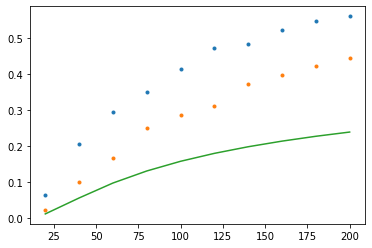

In [5]:
nstepsarray = np.array([20,40,60,80,100,120,140,160,180,200]) # number of steps
npart = 1000 # number of particles (sailors) to let walk around

from math import erfc

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 10

sprobgdist = []
sprobtheory = []
sprobpdist = []

for nsteps in nstepsarray:
    print (nsteps)
    probg,probp = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobgdist.append(1-probg)
    sprobpdist.append(1-probp)
    
    sigma_N = np.sqrt(nsteps)*sigma
    sprobtheory.append(0.5*erfc(xditch/(np.sqrt(2)*sigma_N)))

plt.plot(nstepsarray,sprobpdist,'.')
plt.plot(nstepsarray,sprobgdist,'.')

plt.plot(nstepsarray,sprobtheory)
